# Entrega 2 Proyecto

## Objetivo notebook
Crear un pipeline de exploración que permita explorar, analizar y preparar los datos, así com la extracción de características para la generación de un modelo que indique el nivel de riesgo (bajo, medio, alto) que tiene una persona de acuerdo a su ubicación geográfica y los indicadores ambientales en su zona, con prescripciopnes respecto a actividades y precauciones a tomar en cuenta.


Importación de librerías necesarias

In [14]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # set Agg backend for matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# For model building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

from scipy.stats import spearmanr

### EXPLORACIÓN DE LOS DATOS

In [11]:
from support_functions import *

data_path = '../data/air_quality_health_dataset.csv'
data_df = pd.read_csv(data_path)
print(data_df.head())
print(data_df.info())
print(data_df.describe())
print(data_df.isnull().sum())
print(data_df.duplicated().sum())
data_df = data_df.drop_duplicates()
data_df = data_df.dropna()


show_outliers(data_df, numeric_cols)

          city        date  aqi  pm2_5  pm10   no2    o3  temperature  \
0  Los Angeles  2020-01-01   65   34.0  52.7   2.2  38.5         33.5   
1      Beijing  2020-01-02  137   33.7  31.5  36.7  27.5         -1.6   
2       London  2020-01-03  266   43.0  59.6  30.4  57.3         36.4   
3  Mexico City  2020-01-04  293   33.7  37.9  12.3  42.7         -1.0   
4        Delhi  2020-01-05  493   50.3  34.8  31.2  35.6         33.5   

   humidity  hospital_admissions population_density  hospital_capacity  
0        33                    5              Rural               1337  
1        32                    4              Urban               1545  
2        25                   10           Suburban               1539  
3        67                   10              Urban                552  
4        72                    9           Suburban               1631  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88489 entries, 0 to 88488
Data columns (total 12 columns):
 #   Column   

### Transformación de datos
Se utiliza un pipeline predefinido que aplica la selección y transformación de los datos, que aplica tres generaciones de características y nos permite la generación de 3 sets para evaluar su rendimiento en el entrenamiento.

In [13]:
from preprocessing_pipeline import full_preprocessing_pipeline

for i in range(1, 4):
    X, y, encoder, scaler = full_preprocessing_pipeline(data_df, feature_set=i)
    preprocessed_data = pd.concat([X, y], axis=1)
    preprocessed_data.to_csv(f'../data/preprocessed_air_quality_data_feat_set{i}.csv', index=False)
    print(f"\nOpción {i} de características:")
    print(f"Número de características: {X.shape[1]}")
    print(f"Primeras 5 características: {list(X.columns[:5])}")
    print(f"Dimensiones de X: {X.shape}")
    print(f"Dimensiones de y: {y.shape}")



Opción 1 de características:
Número de características: 15
Primeras 5 características: ['aqi', 'pm2_5', 'pm10', 'no2', 'o3']
Dimensiones de X: (88489, 15)
Dimensiones de y: (88489,)

Opción 2 de características:
Número de características: 14
Primeras 5 características: ['aqi', 'pm2_5', 'pm10', 'no2', 'o3']
Dimensiones de X: (88489, 14)
Dimensiones de y: (88489,)

Opción 3 de características:
Número de características: 19
Primeras 5 características: ['aqi', 'pm2_5', 'pm10', 'no2', 'o3']
Dimensiones de X: (88489, 19)
Dimensiones de y: (88489,)


### Evaluación de los datasets generados con diferentes características

#### Comparando correlación con hospital_admissions


################################################################################
ANALIZANDO CONJUNTO DE CARACTERÍSTICAS 1
################################################################################
Datos cargados: 88489 filas, 16 columnas


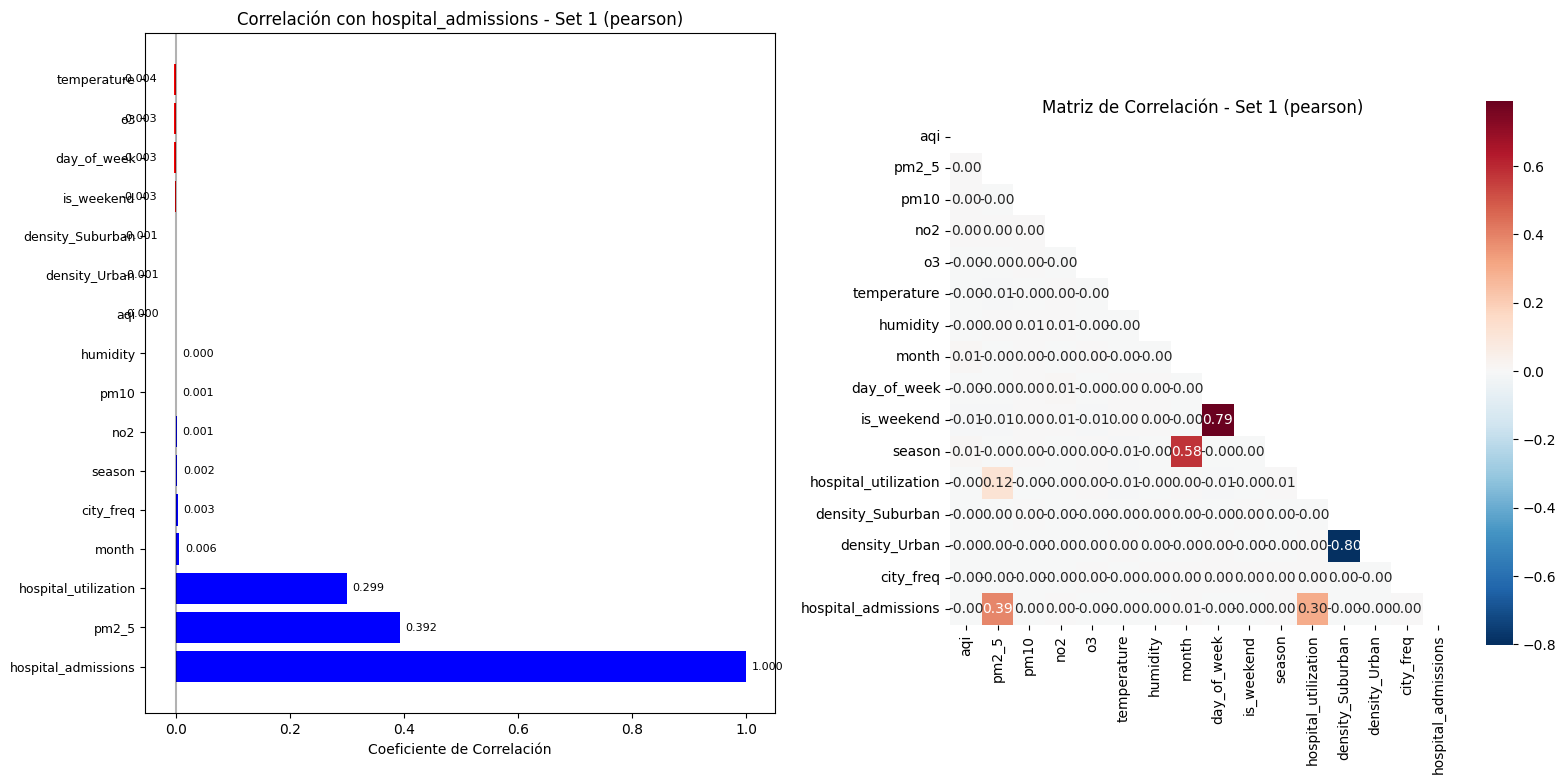


ANÁLISIS DE CORRELACIONES SIGNIFICATIVAS

Variables con correlación POSITIVA fuerte (> 0.3):
  pm2_5: 0.392

Variables con correlación NEGATIVA fuerte (< -0.3):
  No se encontraron correlaciones negativas fuertes

REPORTE DE CORRELACIÓN - CONJUNTO DE CARACTERÍSTICAS 1

Top 5 correlaciones POSITIVAS con hospital_admissions:
  pm2_5: 0.392
  hospital_utilization: 0.299
  month: 0.006
  city_freq: 0.003
  season: 0.002

Top 5 correlaciones NEGATIVAS con hospital_admissions:
  temperature: -0.004
  o3: -0.003
  day_of_week: -0.003
  is_weekend: -0.003
  density_Suburban: -0.001

Estadísticas de correlación:
  Correlación máxima: 0.392
  Correlación mínima: -0.004
  Correlación promedio: 0.046
  Número de variables con |correlación| > 0.3: 1
  Número de variables con |correlación| > 0.5: 0


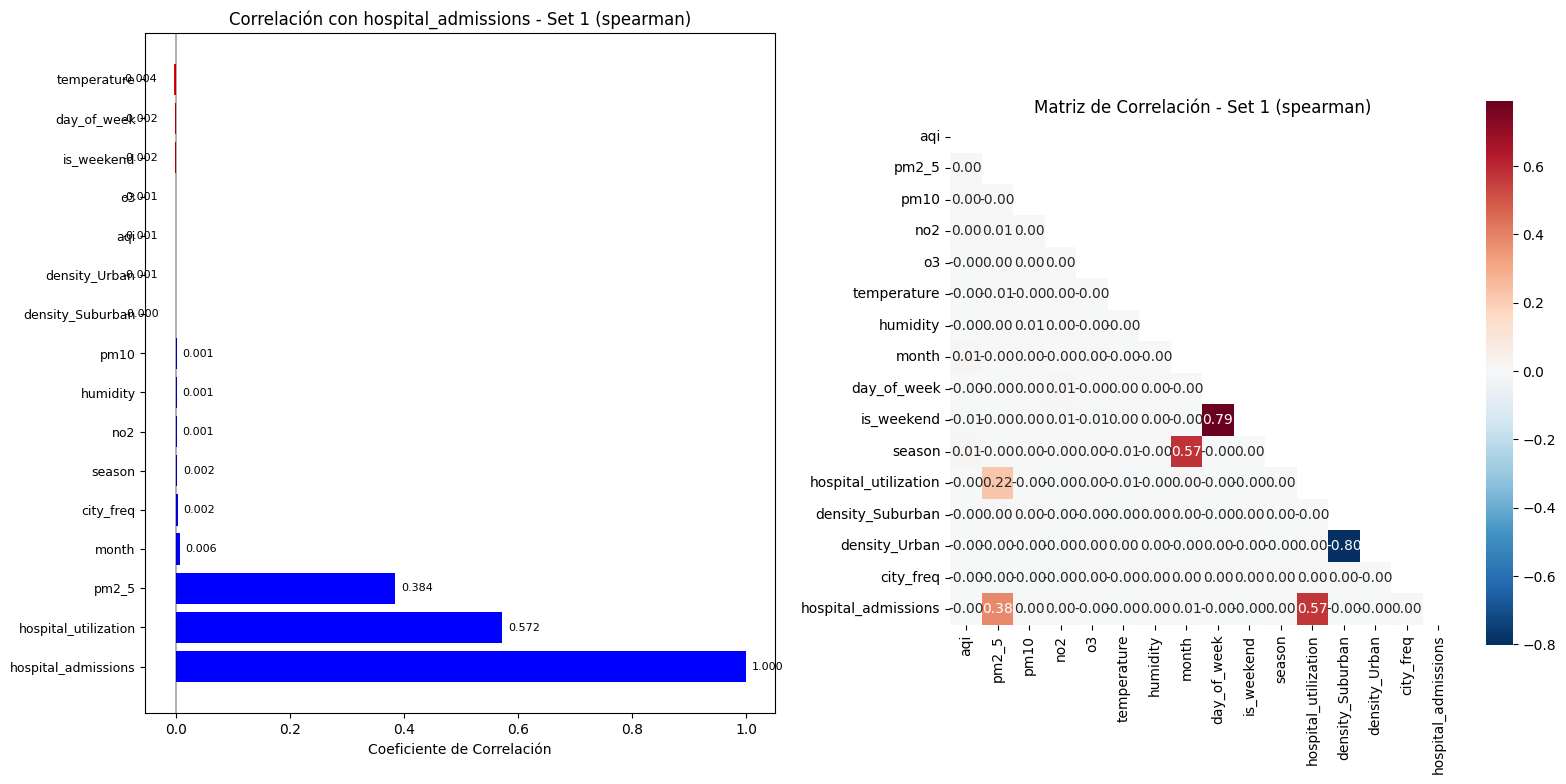


################################################################################
ANALIZANDO CONJUNTO DE CARACTERÍSTICAS 2
################################################################################
Datos cargados: 88489 filas, 15 columnas


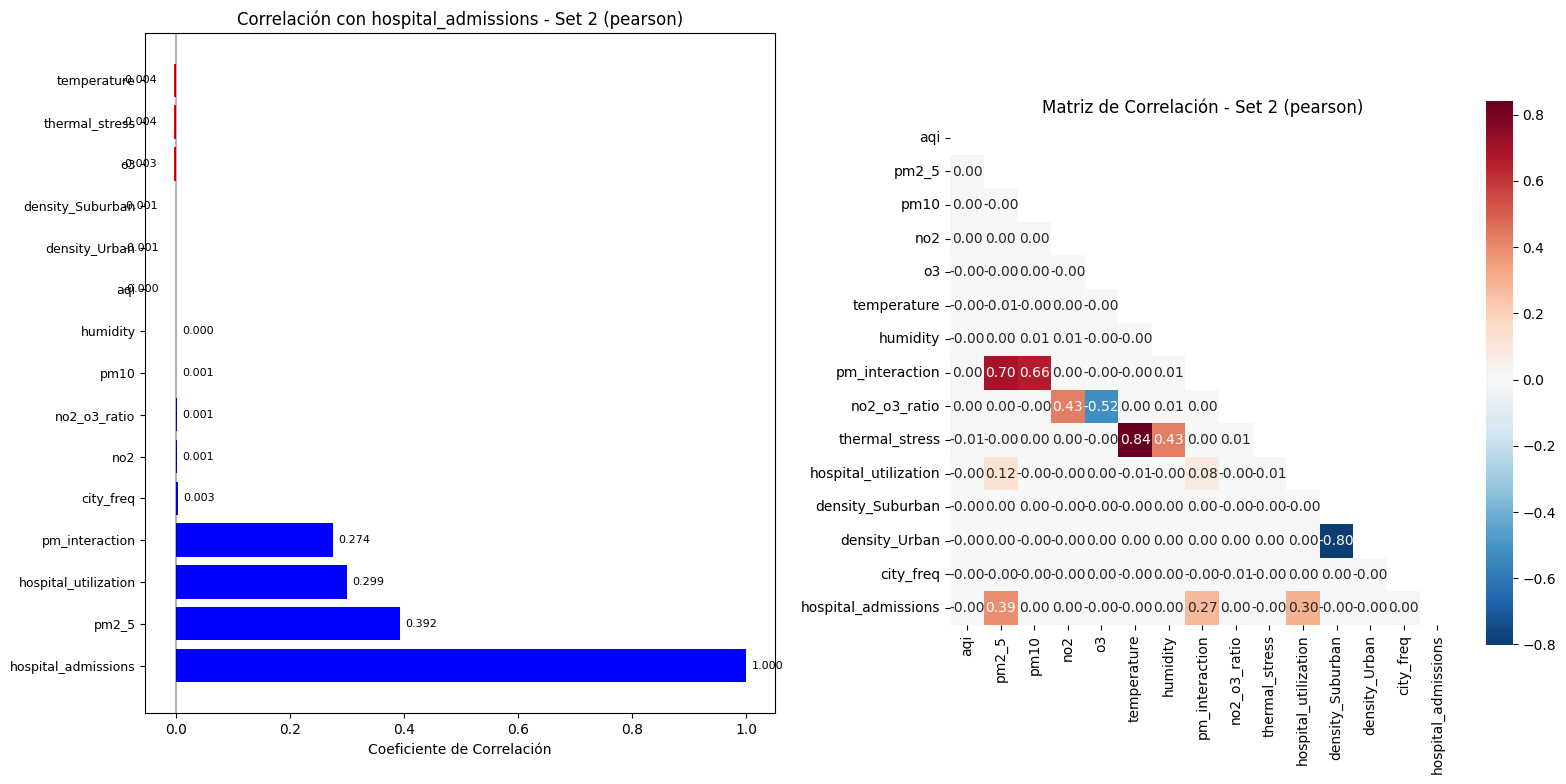


ANÁLISIS DE CORRELACIONES SIGNIFICATIVAS

Variables con correlación POSITIVA fuerte (> 0.3):
  pm2_5: 0.392

Variables con correlación NEGATIVA fuerte (< -0.3):
  No se encontraron correlaciones negativas fuertes

REPORTE DE CORRELACIÓN - CONJUNTO DE CARACTERÍSTICAS 2

Top 5 correlaciones POSITIVAS con hospital_admissions:
  pm2_5: 0.392
  hospital_utilization: 0.299
  pm_interaction: 0.274
  city_freq: 0.003
  no2: 0.001

Top 5 correlaciones NEGATIVAS con hospital_admissions:
  temperature: -0.004
  thermal_stress: -0.004
  o3: -0.003
  density_Suburban: -0.001
  density_Urban: -0.001

Estadísticas de correlación:
  Correlación máxima: 0.392
  Correlación mínima: -0.004
  Correlación promedio: 0.068
  Número de variables con |correlación| > 0.3: 1
  Número de variables con |correlación| > 0.5: 0


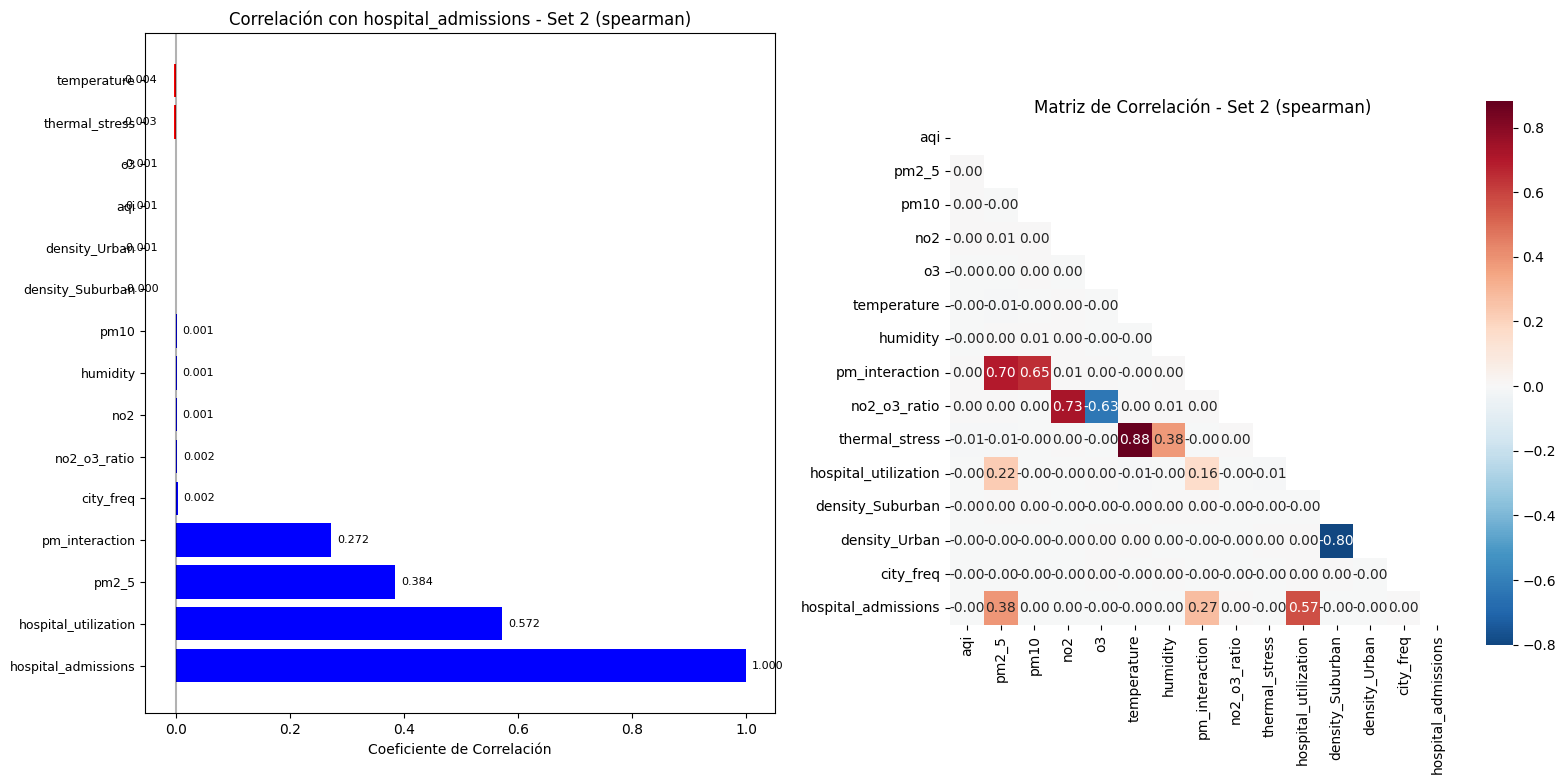


################################################################################
ANALIZANDO CONJUNTO DE CARACTERÍSTICAS 3
################################################################################
Datos cargados: 88489 filas, 20 columnas


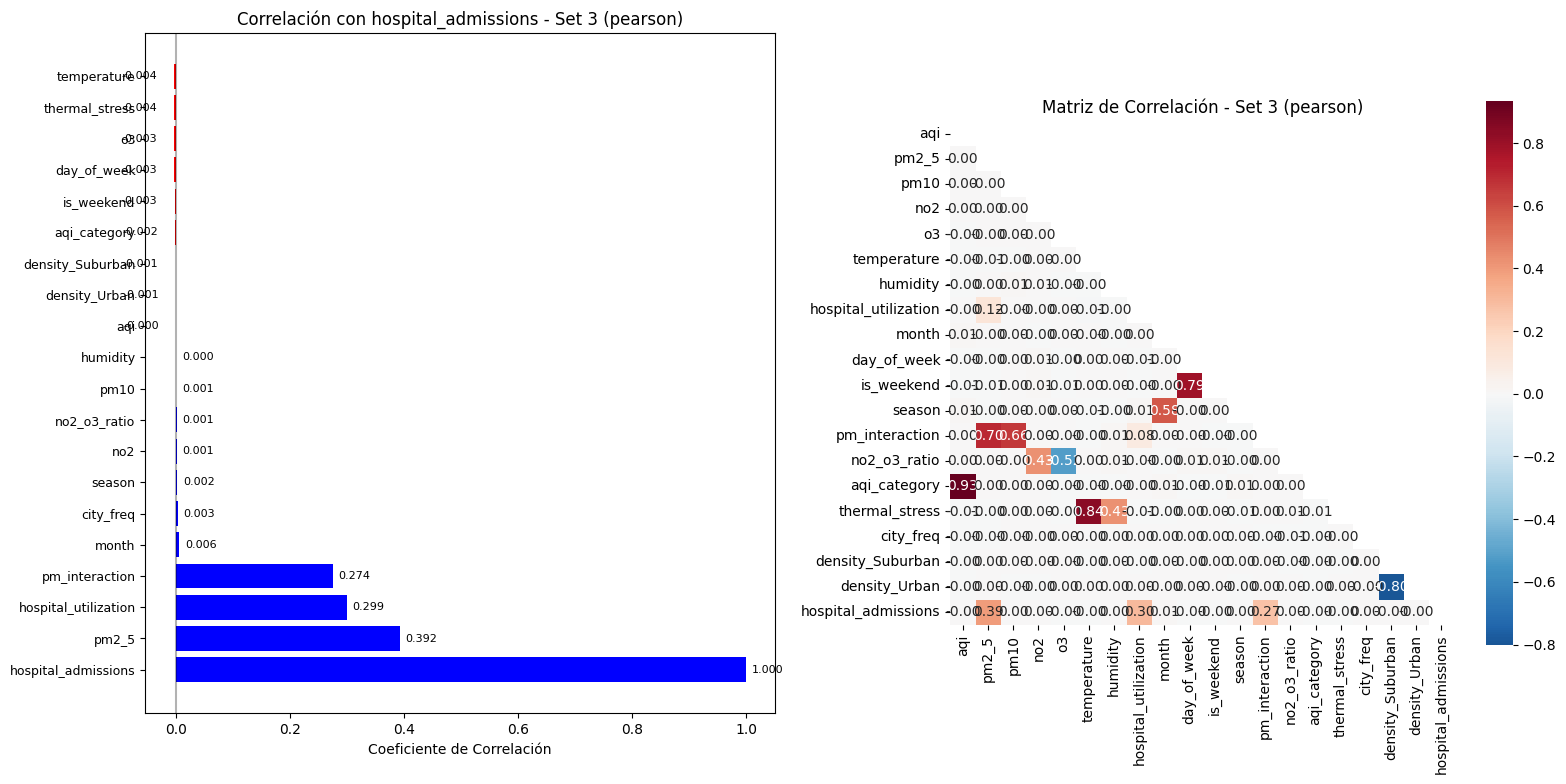


ANÁLISIS DE CORRELACIONES SIGNIFICATIVAS

Variables con correlación POSITIVA fuerte (> 0.3):
  pm2_5: 0.392

Variables con correlación NEGATIVA fuerte (< -0.3):
  No se encontraron correlaciones negativas fuertes

REPORTE DE CORRELACIÓN - CONJUNTO DE CARACTERÍSTICAS 3

Top 5 correlaciones POSITIVAS con hospital_admissions:
  pm2_5: 0.392
  hospital_utilization: 0.299
  pm_interaction: 0.274
  month: 0.006
  city_freq: 0.003

Top 5 correlaciones NEGATIVAS con hospital_admissions:
  temperature: -0.004
  thermal_stress: -0.004
  o3: -0.003
  day_of_week: -0.003
  is_weekend: -0.003

Estadísticas de correlación:
  Correlación máxima: 0.392
  Correlación mínima: -0.004
  Correlación promedio: 0.050
  Número de variables con |correlación| > 0.3: 1
  Número de variables con |correlación| > 0.5: 0


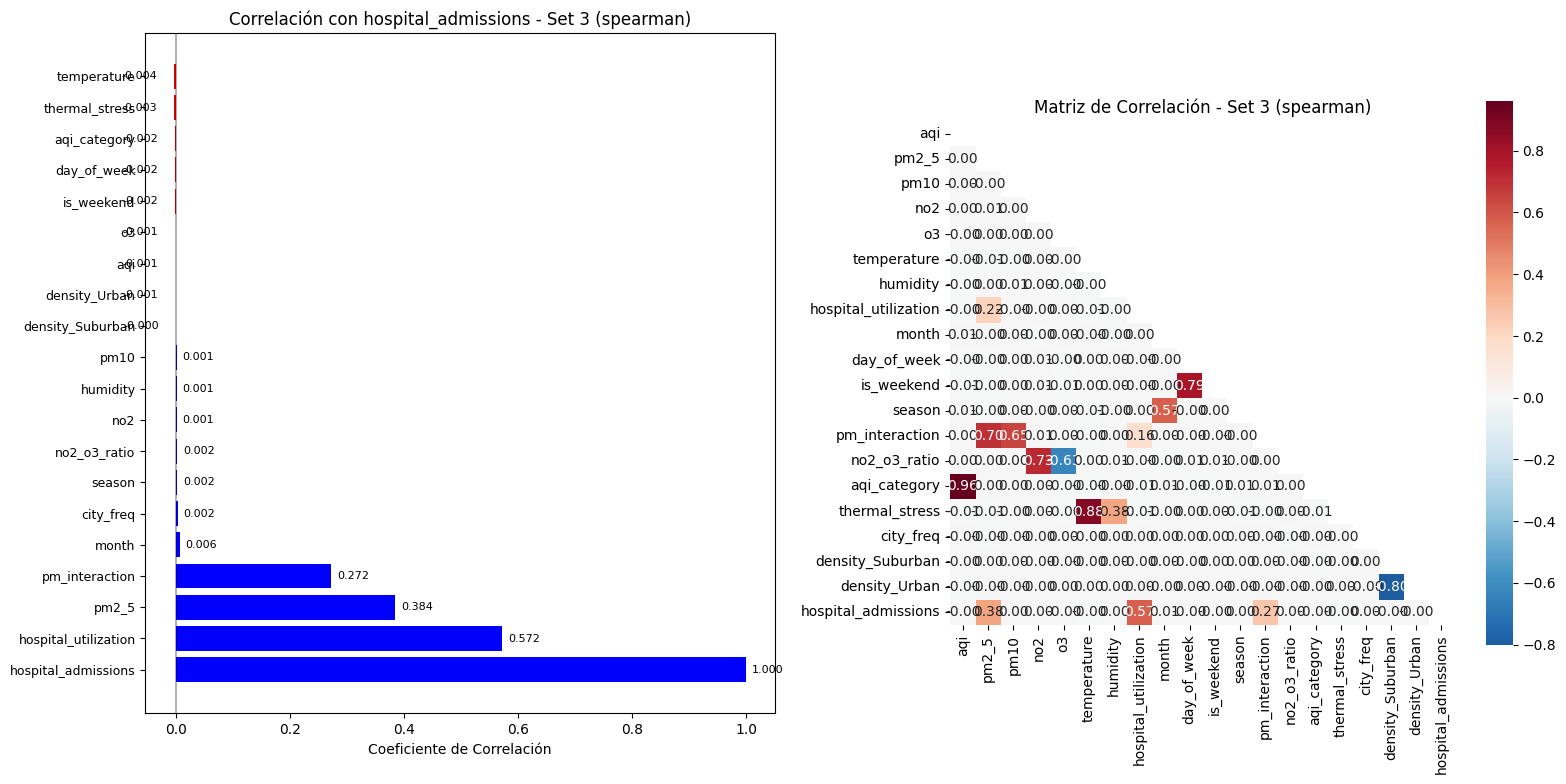


################################################################################
COMPARACIÓN ENTRE LOS TRES CONJUNTOS DE CARACTERÍSTICAS
################################################################################


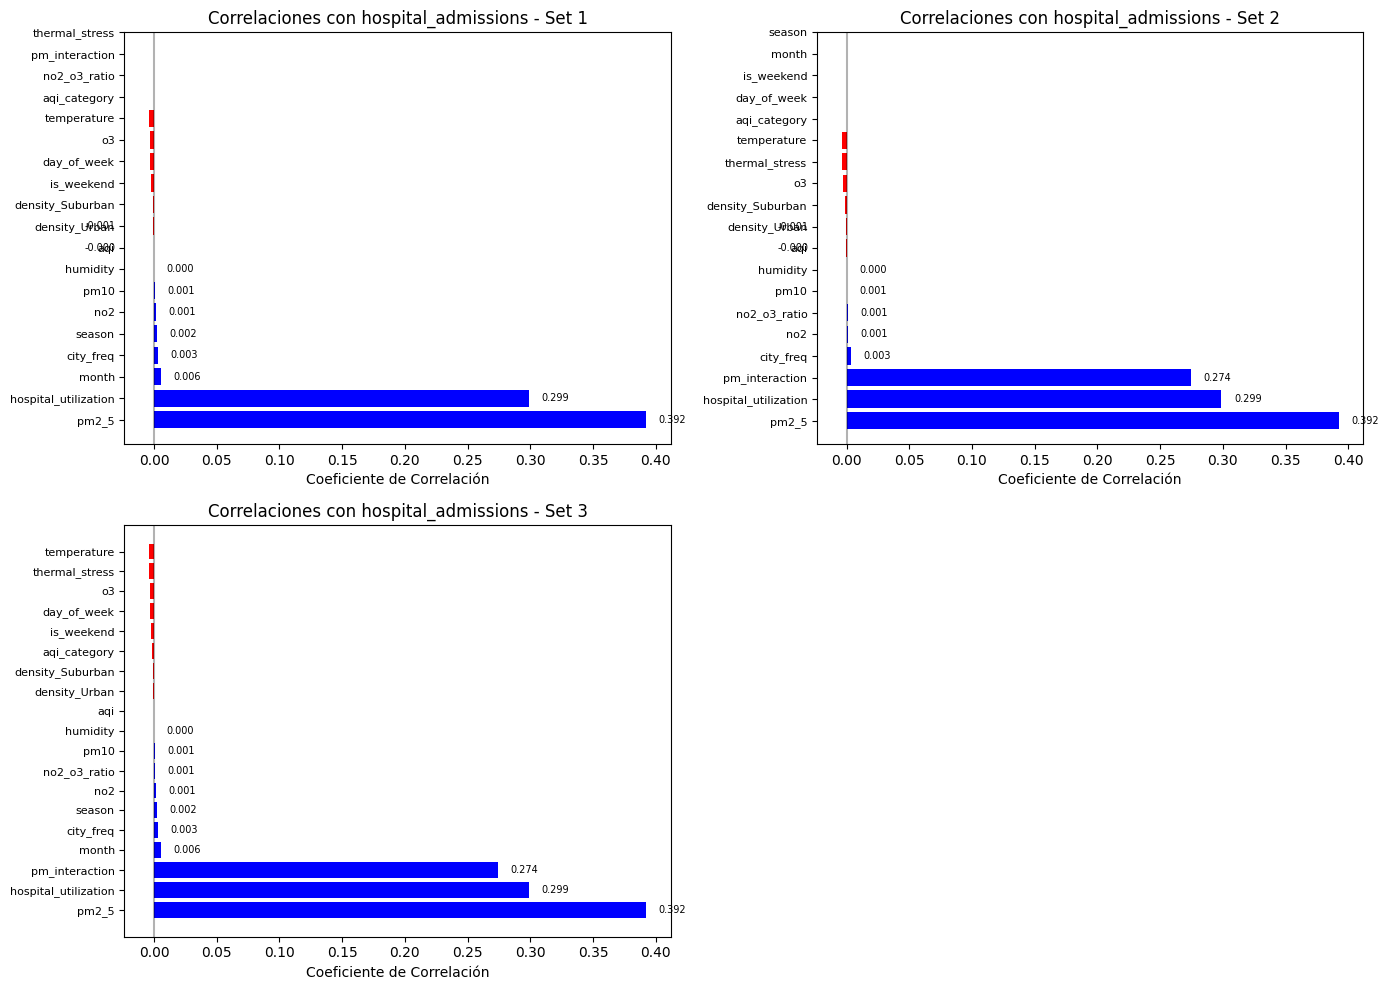


Variables consistentemente correlacionadas en los tres conjuntos:
  pm2_5: 0.392 (promedio)
  hospital_utilization: 0.299 (promedio)

Análisis completado. Todos los gráficos y resultados han sido guardados.


In [16]:
from data_relation_visualization import *

all_correlations = {}

for feature_set in range(1, 4):
    print(f"\n{'#'*80}")
    print(f"ANALIZANDO CONJUNTO DE CARACTERÍSTICAS {feature_set}")
    print(f"{'#'*80}")
    
    try:
        # Cargar datos
        df = load_and_prepare_data(feature_set)
        print(f"Datos cargados: {df.shape[0]} filas, {df.shape[1]} columnas")
        
        # Calcular matriz de correlación (Pearson)
        corr_matrix_pearson = calculate_correlation_matrix(df, 'hospital_admissions', 'pearson')
        
        # Visualizar y analizar
        target_correlations = plot_correlation_matrix(corr_matrix_pearson, 'hospital_admissions', feature_set, 'pearson')
        strong_positive, strong_negative = analyze_correlations(target_correlations, threshold=0.3)
        generate_correlation_report(corr_matrix_pearson, 'hospital_admissions', feature_set)
        
        # Guardar para comparación posterior
        all_correlations[f'Set {feature_set}'] = target_correlations
        
        # También calcular correlación de Spearman (para relaciones no lineales)
        corr_matrix_spearman = calculate_correlation_matrix(df, 'hospital_admissions', 'spearman')
        plot_correlation_matrix(corr_matrix_spearman, 'hospital_admissions', feature_set, 'spearman')
        
        # Guardar matrices de correlación
        corr_matrix_pearson.to_csv(f'../results/correlation_matrix_set_{feature_set}_pearson.csv')
        corr_matrix_spearman.to_csv(f'../results/correlation_matrix_set_{feature_set}_spearman.csv')
        
    except Exception as e:
        print(f"Error procesando el conjunto {feature_set}: {e}")
        continue


# Comparar los tres conjuntos
print(f"\n{'#'*80}")
print("COMPARACIÓN ENTRE LOS TRES CONJUNTOS DE CARACTERÍSTICAS")
print(f"{'#'*80}")

comparison_df = compare_feature_sets_correlations()

# Identificar las variables más consistentemente correlacionadas
consistent_correlations = {}
for variable in comparison_df.index:
    correlations = comparison_df.loc[variable]
    if all(abs(corr) > 0.2 for corr in correlations):  # Correlación moderada en los tres sets
        consistent_correlations[variable] = correlations.mean()

print(f"\nVariables consistentemente correlacionadas en los tres conjuntos:")
if consistent_correlations:
    consistent_df = pd.Series(consistent_correlations).sort_values(ascending=False)
    for var, avg_corr in consistent_df.items():
        print(f"  {var}: {avg_corr:.3f} (promedio)")
else:
    print("  No se encontraron variables con correlación consistente en los tres conjuntos")

# Guardar resultados de la comparación
comparison_df.to_csv('../results/correlation_comparison_all_sets.csv')
consistent_df.to_csv('../results/consistent_correlations.csv')

print("\nAnálisis completado. Todos los gráficos y resultados han sido guardados.")



En la evaluación de correlación, se encuentra que la variable pm_2_5 es la de más alta incidencia en los niveles de hospitalización.